In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Define relevant functions

In [2]:
def softmax(x):
    row_sums = np.sum(np.exp(x), axis=1)
    return np.exp(x) / row_sums[:, None]


def check_available_points_on_curve(dir: str, file_name: str):
    path = "../../" + dir + file_name
    stats = np.load(path)
    return stats["points_on_curve"]


def load_probabilities(set, point_on_curve, dir: str, file_name: str):
    path = "../../" + dir + file_name
    stats = np.load(path)
    id_point_on_curve = np.isclose(stats["points_on_curve"], point_on_curve)
    target = stats[set + "_targets"][id_point_on_curve][0]
    output = stats[set + "_output"][id_point_on_curve][0]
    output_probs = softmax(output)
    output_prob_of_pred = output_probs[np.arange(output_probs.shape[0]), target]
    data = pd.DataFrame({"Target": target, "output_prob_of_pred": output_prob_of_pred})
    return data

 Set directory and file

In [16]:
dir = "results/MNIST_CNNBN/evaluation_curve/"

file_name = "predictions_and_probabilities_curve_epoch15.npz"

 Check which points of curve have been evaluated

In [17]:
print(check_available_points_on_curve(dir, file_name))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 Set evaluation parameters

In [18]:
set = "train"  # "train" or "test"

point_on_curve = 0.5  # For evaluated points on curve see above

target_to_evaluate = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Choose from

clip_min = 0  # Minimum of x-axis (probabilites)
clip_max = 1  # Maximum of x-axis (probabilites)

bandwidth = 0.01  # Bandwidth of kernel for densities

 Load dataset

In [19]:
data = load_probabilities(set, point_on_curve, dir, file_name)
data_subset = data[data["Target"].isin(target_to_evaluate)]

 Plot density plot

Text(0.5, 0, 'Probabilities of predictions')

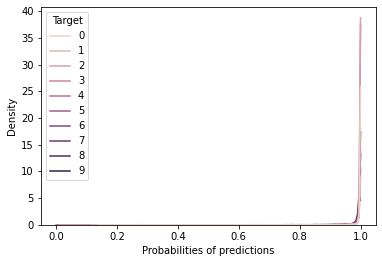

In [20]:
sns.kdeplot(
    data=data_subset,
    x="output_prob_of_pred",
    hue="Target",
    bw_method=bandwidth,
    clip=(clip_min, clip_max),
)
plt.xlabel("Probabilities of predictions", fontsize=10)

Ideally we would see:
- Very high density for probabilites close to 1
- Very low density for probabilities lower than 1
- Not much deviation in probabilites between different targets